In [15]:
import pandas as pd
import numpy as np
import joblib

# Loading the model and names back into memory
log_model = joblib.load('telco_model.pkl')
feature_cols = joblib.load('feature_names.pkl')

In [17]:
feature_importance = pd.Series(
    log_model.coef_[0],
    index=feature_cols
).sort_values()

feature_importance.tail(10)

TechSupport_No                    0.099381
OnlineSecurity_No                 0.114851
MultipleLines_Yes                 0.121940
PaymentMethod_Electronic check    0.126226
PaperlessBilling                  0.164765
StreamingTV_Yes                   0.199349
StreamingMovies_Yes               0.205600
Contract_Month-to-month           0.321410
InternetService_Fiber optic       0.460272
TotalCharges                      0.491616
dtype: float64

In [19]:
feature_importance.head(10)

tenure                                 -1.156739
MonthlyCharges                         -1.112496
InternetService_DSL                    -0.364725
Contract_Two year                      -0.341087
TechSupport_No internet service        -0.134443
DeviceProtection_No internet service   -0.134443
OnlineBackup_No internet service       -0.134443
InternetService_No                     -0.134443
StreamingTV_No internet service        -0.134443
OnlineSecurity_No internet service     -0.134443
dtype: float64

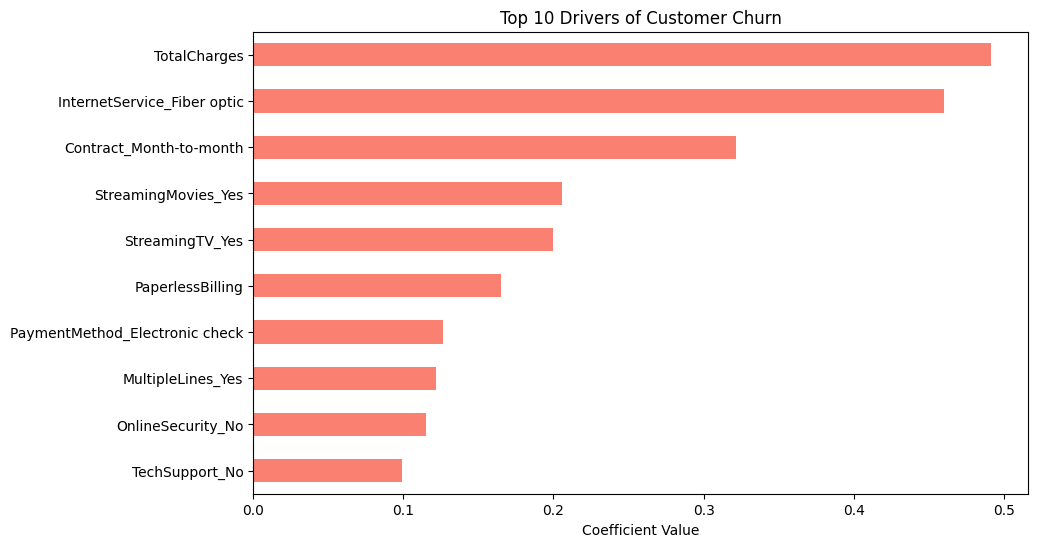

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
feature_importance.tail(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Drivers of Customer Churn')
plt.xlabel('Coefficient Value')
plt.show()

# Key Drivers of Customer Churn

**The logistic regression model highlights several factors that significantly influence customer churn:**

**Factors increasing churn risk:**
- Month-to-month contracts are the strongest predictor of churn
- Electronic check payment method is associated with higher churn
- Fiber optic internet service increases churn likelihood
- Paperless billing correlates with churn behavior
- Senior citizens show higher churn propensity

**Factors reducing churn risk:**
- Two-year and one-year contracts strongly reduce churn
- Longer customer tenure lowers churn probability
- Online security and tech support subscriptions reduce churn
- Automatic payment methods are associated with lower churn
- Customers with dependents are less likely to churn

These insights provide actionable levers for customer retention strategies.

In [21]:
import os
os.makedirs('../outputs', exist_ok=True)

In [22]:
feature_importance.to_csv(
    "../outputs/logistic_feature_importance.csv"
)